Сгенерируйте данные с помощью кода:

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import  Lasso # линейная модель с L1-регуляризацией
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
X, y = make_classification(scale=1)


In [ ]:
res_tab = {}
labels = []
for i in range(20):
    labels.append('X' + str(i))

df = pd.DataFrame(X, columns=labels)
df ['y'] = y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      100 non-null    float64
 1   X1      100 non-null    float64
 2   X2      100 non-null    float64
 3   X3      100 non-null    float64
 4   X4      100 non-null    float64
 5   X5      100 non-null    float64
 6   X6      100 non-null    float64
 7   X7      100 non-null    float64
 8   X8      100 non-null    float64
 9   X9      100 non-null    float64
 10  X10     100 non-null    float64
 11  X11     100 non-null    float64
 12  X12     100 non-null    float64
 13  X13     100 non-null    float64
 14  X14     100 non-null    float64
 15  X15     100 non-null    float64
 16  X16     100 non-null    float64
 17  X17     100 non-null    float64
 18  X18     100 non-null    float64
 19  X19     100 non-null    float64
 20  y       100 non-null    int32  
dtypes: float64(20), int32(1)
memory usage: 1

Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:

In [ ]:
r = cross_val_score(LogisticRegression(), X, y, scoring='accuracy').mean()
res_tab['Исходные данные'] = round(r, 3)
res_tab

{'Исходные данные': 0.91}

Используйте статистические методы для отбора признаков:
a) Выберите признаки на основе матрицы корреляции.
b) Отсеките низковариативные признаки (VarianceThreshold).
c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

<Axes: >

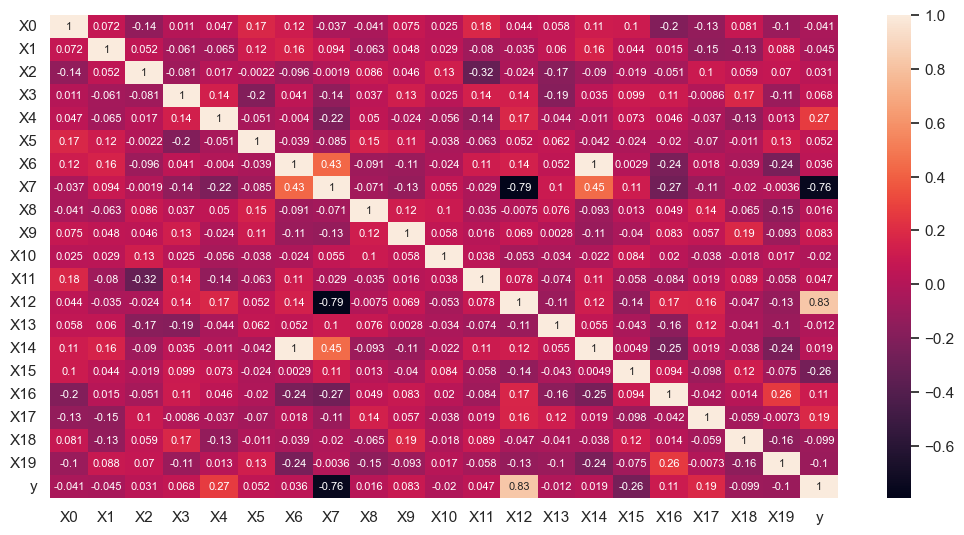

In [ ]:
sns.set(rc={'figure.figsize':(12.7, 6.27)})
sns.heatmap(df.corr(method = 'spearman'), annot=True, annot_kws={'fontsize':8})

In [ ]:
# Убираем X6 и  X14 - сильная корреляция между собой и слабая с целевым значением
df_1 = df.copy()
df_1.drop(['X14', 'X6'], axis= 1 , inplace= True)

In [ ]:
selector = VarianceThreshold(threshold=0.99)
df_1 = selector.fit_transform(df_1)
# сохраняем заголовки оставшихся классов
l = selector.get_feature_names_out()
df_1.shape

(100, 10)

In [ ]:
df_1 = pd.DataFrame(df_1, columns=l)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X4      100 non-null    float64
 1   X5      100 non-null    float64
 2   X8      100 non-null    float64
 3   X9      100 non-null    float64
 4   X10     100 non-null    float64
 5   X11     100 non-null    float64
 6   X12     100 non-null    float64
 7   X13     100 non-null    float64
 8   X16     100 non-null    float64
 9   X17     100 non-null    float64
dtypes: float64(10)
memory usage: 7.9 KB


In [ ]:
r = cross_val_score(LogisticRegression(), df_1, y, scoring='accuracy').mean()
res_tab['Матрица корреляций'] = round(r, 3)
res_tab

{'Исходные данные': 0.91, 'Матрица корреляций': 0.89}

Осуществите отбор признаков на основе дисперсионного анализа:
a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).
b) Повторите п. 2 на отобранных признаках.

In [ ]:
selector = SelectKBest(f_classif, k=5)
df_2 = selector.fit_transform(X, y)
# сохраняем заголовки оставшихся классов
l = selector.get_feature_names_out()
df_2.shape

(100, 5)

In [ ]:
df_1 = pd.DataFrame(df_1, columns=l)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x4      0 non-null      float64
 1   x7      0 non-null      float64
 2   x12     0 non-null      float64
 3   x15     0 non-null      float64
 4   x17     0 non-null      float64
dtypes: float64(5)
memory usage: 4.0 KB


In [ ]:
r = cross_val_score(LogisticRegression(), df_2, y, scoring='accuracy').mean()
res_tab['SelectKBest'] = round(r, 3)
res_tab

{'Исходные данные': 0.91, 'Матрица корреляций': 0.89, 'SelectKBest': 0.94}

a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.

In [ ]:
selector = SelectFromModel(estimator=LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear'))
df_3 = selector.fit(X, y)
l = selector.get_feature_names_out()
df_3

SelectFromModel(estimator=LogisticRegression(class_weight='balanced',
                                             penalty='l1', solver='liblinear'))

In [ ]:
l

array(['x0', 'x3', 'x4', 'x8', 'x11', 'x12', 'x14', 'x15', 'x16', 'x17',
       'x18'], dtype=object)

In [ ]:
X_ = df_3.transform(X)
X_.shape

(100, 11)

In [ ]:
r = cross_val_score(LogisticRegression(), X_, y, scoring='accuracy').mean()
res_tab['SelectFromModel'] = round(r, 3)
res_tab


{'Исходные данные': 0.91,
 'Матрица корреляций': 0.89,
 'SelectKBest': 0.94,
 'SelectFromModel': 0.9}

b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.
c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [ ]:
model = RandomForestClassifier(max_depth=3, random_state=42)
model.fit(X, y)


RandomForestClassifier(max_depth=3, random_state=42)

In [ ]:
res = {}
for i in range(len(labels)):
    res[labels[i]] = model.feature_importances_[i]

res = dict(sorted(res.items(), key=lambda x: x[1], reverse=True)[:5])
X_= df[list(res.keys())]
X_.head()


,X12,X7,X15,X4,X14
0,0.661373,0.006612,0.348408,1.518704,0.969568
1,-1.397944,0.649248,-0.630272,-0.180522,0.546941
2,0.847908,0.233985,1.234554,0.009161,2.125825
3,1.033935,-0.150334,0.164632,-1.000098,0.886765
4,1.204961,0.224094,0.014634,-1.493416,2.596567


In [ ]:
r = cross_val_score(LogisticRegression(), X_, y, scoring='accuracy').mean()
res_tab['RandomForest'] = round(r, 3)
res_tab

{'Исходные данные': 0.91,
 'Матрица корреляций': 0.89,
 'SelectKBest': 0.94,
 'SelectFromModel': 0.9,
 'RandomForest': 0.94}

Перебор признаков:
a) SequentialFeatureSelector.
b) Повторите п. 2 на отобранных признаках.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=5)
sfs.fit(X, y)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=5)

In [ ]:
sfs.get_feature_names_out()

array(['x4', 'x6', 'x7', 'x12', 'x14'], dtype=object)

In [ ]:
X_ = sfs.transform(X)
X_.shape

(100, 5)

In [ ]:
r = cross_val_score(LogisticRegression(), X_, y, scoring='accuracy').mean()
res_tab['SequentialFeatureSelector'] = round(r, 3)
res_tab

{'Исходные данные': 0.91,
 'Матрица корреляций': 0.89,
 'SelectKBest': 0.94,
 'SelectFromModel': 0.9,
 'RandomForest': 0.94,
 'SequentialFeatureSelector': 0.94}

In [ ]:
res_ = {k:[v] for k,v in res_tab.items()}
res_ = pd.DataFrame.from_dict(res_)
res_

,Исходные данные,Матрица корреляций,SelectKBest,SelectFromModel,RandomForest,SequentialFeatureSelector
0,0.91,0.89,0.94,0.9,0.94,0.94
